**this is a template notebook. To get a 60 you will need to complete the first three chapters. From there is additional points. In the template you'll see text between <> so \<example> where you will have to isert your own text. 
    The template is also just an indication. You can add more cells if needed, and can of course delete this line**

# Tom van der Lans | Spotify
## DMS - Regression Assignment (v1.1)
Author: Tom van der Lans</span><br>
Student number: 63554<br>
Date: 16-05-2022

For this notebook to work you must have installed the following packages (usually via pip install *packageName*:
* numpy
* pandas
* Matplot
* seaborn
* sklearn
* statsmodels

From these we will need the following libraries:

In [300]:
#!pip install seaborn
# !pip install statsmodels
# !pip install sklearn

#enter here all those 'from .... import ....'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split



# 1. The Data
We are going to use the datafile songs_normalize.csv. This contains data from "https://www.kaggle.com/datasets/paradisejoy/top-hits-spotify-from-20002019".

In [301]:
#enter the code to load the data
songs = pd.read_csv("songs_normalize.csv")

Here's a quick look at the data:

In [302]:
#enter the code to see the first few rows of the data
songs.head()


,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


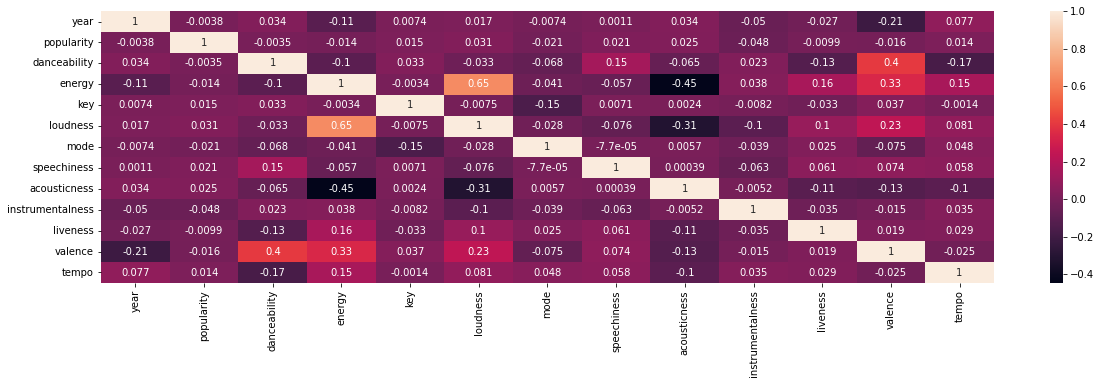

In [303]:
# let's see the correlation between variables
songsWithScaleVariables = songs[['year', 'popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']].copy()

corrMatrix = songsWithScaleVariables.corr()
plt.figure(figsize= (20, 5))
sn.heatmap(corrMatrix, annot=True)
plt.show()

We are gonna predict the valence (the positive feeling) of a song by looking at the danceability (how danceable the song is) and energy (how energetic the song is) of the song. As we can see in the correalation matrix there is a positive trend between valence and danceability, energy. they are both between 0.3 and 0.4.

*note:* You can score a +.5 point if you don't just pick randomly your variables, but use either a pairplot (a plot showing all scatterplots between all possible pairs of variables), a heatmap, and/or a correlation matrix, to pick some that at least have a reasonable correlation.

# 2. The Bivariate Regression

## 2.1. The First Bivariate Regression

First we are going to look at the predictions using only one of our two x's. 

We start with predicting valence using danceability. Below a visualisation of these two:

In [304]:
danceability = songs['danceability'].to_numpy()
energy = songs['energy'].to_numpy()
valence = songs['valence'].to_numpy()

sx2 = danceability.var()
mxy = np.array(danceability*valence).mean()
b1=(mxy-danceability.mean()*valence.mean())/sx2

b0=valence.mean()-b1*danceability.mean()

myPrediction = b0 + b1*danceability

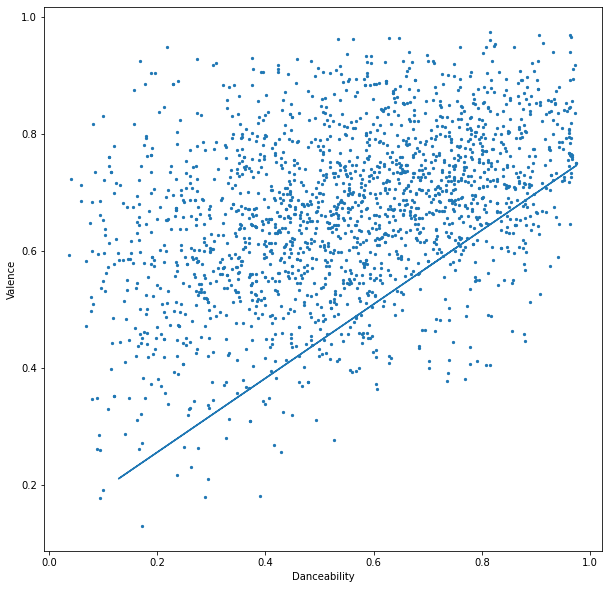

In [305]:
#enter code to show scatterplot
plt.figure(figsize=(10, 10))
plt.scatter(valence, danceability, s=5)
plt.ylabel('Valence')
plt.xlabel('Danceability')
plt.plot(danceability, myPrediction)
plt.show()



As can be seen from the scatterplot there seems to be a linear correlation between these 2, it isn't a very big or clear one but we can see that when the dancebility increases the valence also does

Now that we have a visual inspection its time to perform a bivariate regression (twice, once for each x variable). 

We first split the data into training and testing data. We start again with the x of: danceability

In [306]:
#add code to create training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(danceability, valence, test_size=0.4, random_state=101)

Now setup the linear regression model and fit our training data:

In [307]:
#add code to create linear regression model
xRes = X_train.reshape((-1,1))
yRes = Y_train.reshape((-1,1))

model = LinearRegression().fit(xRes, yRes)

model.fit(xRes, yRes)
Y_pred = model.predict(xRes)


In [308]:
b1 = model.coef_[0]
print('The slope (b1): ', b1[0])
b0 = model.intercept_
print('The intercept (b0): ', b0[0])
MA = metrics.mean_absolute_error(yRes, Y_pred)
print('Mean absolute error: ', MA)
MS = metrics.mean_squared_error(yRes, Y_pred)
print('Mean squared error: ', MS)

The slope (b1):  0.6414181950215943
The intercept (b0):  0.12136468454132515
Mean absolute error:  0.16708856224597954
Mean squared error:  0.040962534278484515


Lets see how well the model performed with the training data, by visualisation:

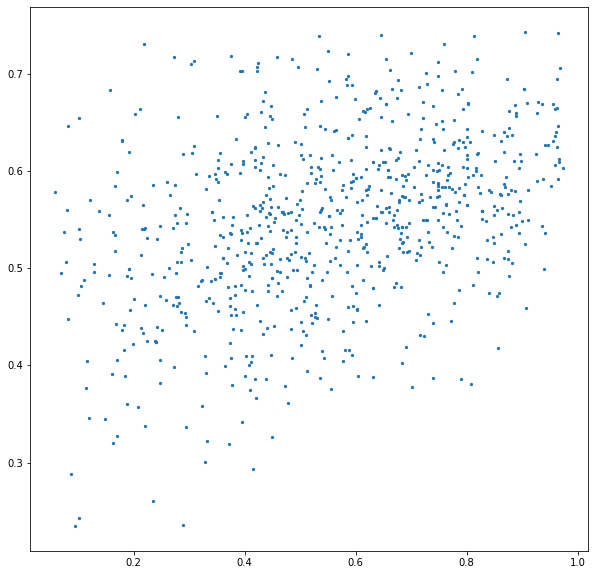

In [309]:
#add code to show scatterplot with the regression line
predictions = model.predict(X_test.reshape(-1,1))

# sx2 = predictions.var()
# mxy = np.array(predictions*Y_test).mean()
# b1=(mxy-predictions.mean()*Y_test.mean())/sx2

# b0=Y_test.mean()-b1*predictions.mean()

# myPrediction = b0 + b1*predictions

plt.figure(figsize=(10, 10))
plt.scatter(Y_test, predictions, s=5)
# plt.plot(predictions, myPrediction)

plt.show()

<span style='background:yellow'>\<describe how well the line describes the data></span>

Besides from a visual, we can also use some metrics.

In [310]:
#code to show the results of the statsmodels.api summary
X = danceability
X = sm.add_constant(X)

Y = valence

model = sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     387.8
Date:                Tue, 17 May 2022   Prob (F-statistic):           4.78e-79
Time:                        16:15:38   Log-Likelihood:                 360.43
No. Observations:                2000   AIC:                            -716.9
Df Residuals:                    1998   BIC:                            -705.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1284      0.022      5.847      0.000       0.085       0.171
x1             0.6342      0.032     19.693      0.000       0.571       0.697
==============================================================================
Omnibus:                       59.718   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.697
Skew:                          -0.223   Prob(JB):                     2.40e-09
Kurtosis:                       2.472   Cond. No.                         10.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<span style='background:yellow'>\<explain in your own words what the R-squared means and indicates, and the two numbers in the column of coef></span>

We can also check how well our model worked by using the testing data:

In [311]:
#code to show the accuracy score
X = X_test
X = sm.add_constant(X)

Y = Y_test

model = sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.150
Method:                 Least Squares   F-statistic:                     141.6
Date:                Tue, 17 May 2022   Prob (F-statistic):           3.57e-30
Time:                        16:15:38   Log-Likelihood:                 146.33
No. Observations:                 800   AIC:                            -288.7
Df Residuals:                     798   BIC:                            -279.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1395      0.036      3.920      0.000       0.070       0.209
x1             0.6225      0.052     11.900      0.000       0.520       0.725
==============================================================================
Omnibus:                       21.064   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.949
Skew:                          -0.192   Prob(JB):                     0.000935
Kurtosis:                       2.479   Cond. No.                         10.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<span style='background:yellow'>\<explain in your own words what this number means></span>

Now we repeat all these steps, but using the other x-variable: energy.

## 2.2. The Second Bivariate Regression

In this section we are going to repeat all the steps from the previous one, but now we are going to try to predict <span style='background:yellow'> < your y-variable name > </span>. based on <span style='background:yellow'> <your other x-variable name\>  </span>

Below a visualisation of these two:

In [312]:
sx2 = energy.var()
mxy = np.array(energy*valence).mean()
b1=(mxy-energy.mean()*valence.mean())/sx2

b0=valence.mean()-b1*energy.mean()

myPrediction = b0 + b1*energy

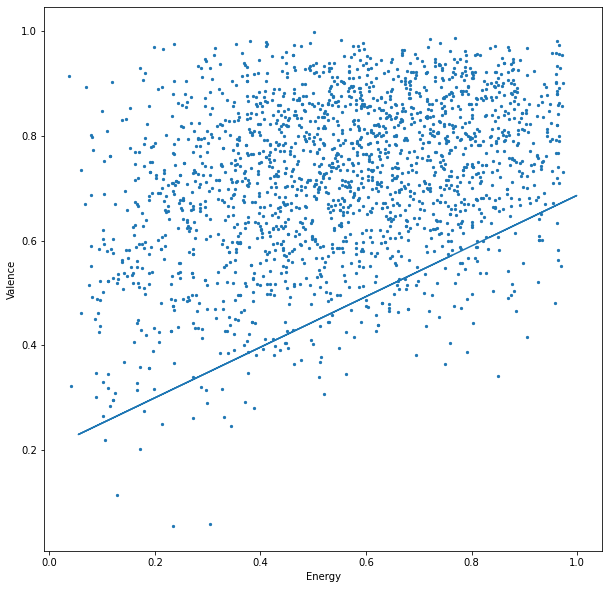

In [313]:
#enter code to show scatterplot
plt.figure(figsize=(10, 10))
plt.scatter(valence, energy, s=5)
plt.ylabel('Valence')
plt.xlabel('Energy')
plt.plot(energy, myPrediction)
plt.show()



As can be seen from the scatterplot there seems to be a correlation between energy and the valence of a song, again not a strong one but there is a climbing line.

Creating again the training/testing sets and the model itself:

In [314]:
#add code here to split the data and the model itself:
X_train, X_test, Y_train, Y_test = train_test_split(energy, valence, test_size=0.2, random_state=101)

xRes = X_train.reshape((-1,1))
yRes = Y_train.reshape((-1,1))

model = LinearRegression().fit(xRes, yRes)

model.fit(xRes, yRes)
Y_pred = model.predict(xRes)

Now lets see how this performs:

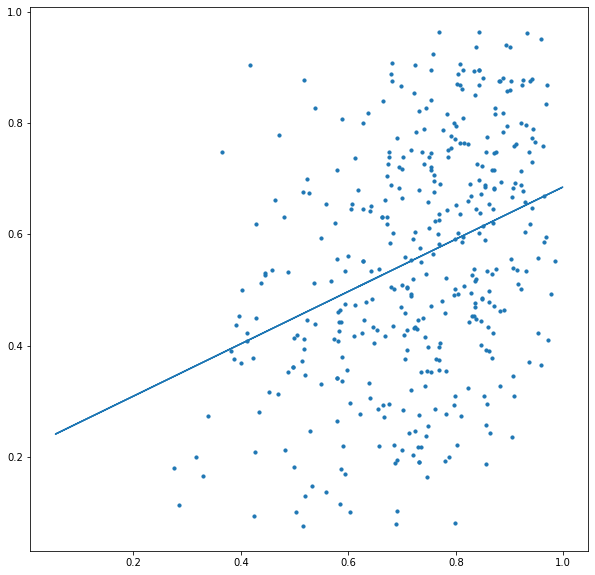

In [315]:
#add code to show both the scatterplot with the regression line, and the model summary results.
plt.figure(figsize=(10, 10))
plt.scatter(X_test, Y_test, s=10)
plt.plot(xRes, Y_pred)

plt.show()

In [316]:
#code to show the results of the statsmodels.api summary
X = energy
X = sm.add_constant(X)

Y = valence

model = sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     251.7
Date:                Tue, 17 May 2022   Prob (F-statistic):           1.79e-53
Time:                        16:15:39   Log-Likelihood:                 301.68
No. Observations:                2000   AIC:                            -599.4
Df Residuals:                    1998   BIC:                            -588.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2033      0.022      9.056      0.000       0.159       0.247
x1             0.4836      0.030     15.864      0.000       0.424       0.543
==============================================================================
Omnibus:                      103.312   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.118
Skew:                          -0.072   Prob(JB):                     7.15e-10
Kurtosis:                       2.304   Cond. No.                         10.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<span style='background:yellow'>\<describe the outcome as before, and now also compare the results with the results of section 2.1.></span>

# 3. Multivariate Regression Analysis

In the previous chapter two separate bivariate regression analyses were performed to predict the valence based on danceability and energy separately. In this chapter we are going to look if we can make an even better prediction if we try to predict valence based on BOTH of these together.

We begin with combining the two x's into one X:

In [317]:
#add code here to add the two x's into one
x1Res = danceability.reshape((-1, 1))
x2Res = energy.reshape((-1, 1))
yRes = valence.reshape((-1, 1))

multiX = np.hstack((x1Res, x2Res))

To actually perform the regression now, we can use the exact same method as before with the bivariate one:

In [318]:
#code to split the data, and create & fit the model:
multiModel = LinearRegression().fit(multiX, yRes)
yPred = multiModel.predict(multiX)
det = metrics.r2_score(yRes, yPred)

adjDet = 1 - (1-det) * (yRes.shape[0] - 1) / (yRes.shape[0] - multiX.shape[1] - 1)

print(adjDet)

0.30509972073806546


A visualisation becomes now more difficult, since it would have to be in 3D. (0.5 bonus if you manage to do this). However, the model summary still works:

In [320]:
#code to show model summary and accuracy score
newX = sm.add_constant(multiX)
newModel = sm.OLS(valence, newX).fit()
newPred = newModel.predict(newX)
newModel.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.305
Method:                 Least Squares   F-statistic:                     439.8
Date:                Tue, 17 May 2022   Prob (F-statistic):          5.32e-159
Time:                        16:15:48   Log-Likelihood:                 548.03
No. Observations:                2000   AIC:                            -1090.
Df Residuals:                    1997   BIC:                            -1073.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3095      0.029    -10.521      0.000      -0.367      -0.252
x1             0.6964      0.029     23.619      0.000       0.639       0.754
x2             0.5502      0.027     20.299      0.000       0.497       0.603
==============================================================================
Omnibus:                       30.640   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.310
Skew:                          -0.204   Prob(JB):                     3.19e-06
Kurtosis:                       2.629   Cond. No.                         14.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Instead of looking at the R-square, we should be looking at the adjusted R-square. <span style='background:yellow'>< explain why></span>.

We also see more rows now in the 'coef' column. <span style='background:yellow'>\<explain why this is></span>.

<span style='background:yellow'>\<explain how this model performs compared to the other two from chapter 2/></span>

A last thing to do would be to check the VIF's:

In [ ]:
#add code here to see the VIF's


<span style='background:yellow'>\<explain what to look for in the results></span>

<font size="5"><center>-----Chapters 1 to 3 are required to be fully completed to get a 60, the next few chapters will give a +10 for each chapter.<br> 
    However the template is not as extensive as the previous chapters. <br>
    You can select any chapter below the order is not fixed (you can leave the others empty)<br>
    You don't have to use the same dataset for the chapters below. If it helps in clarification you can use another dataset, but then make sure to include it as you submit.
    ----</center></font>

# 4. Selecting Input Variables

In chapter 3 we improved on the model to predict <span style='background:yellow'>\<your y-variable name></span> by using two input variables. We can actually add as many input variables as we like. Lets explore this by simply first adding ALL other variables as X.

In [ ]:
#add code to create an X variable using all variables, except of course your y variable:


We could first have a quick look at the results of this model:

In [ ]:
#add code here to model and fit the new X with the y, and show the model summary and accuracy score:


However we have to be careful with those VIF's. So lets see:

In [ ]:
#add code here to show the VIF's.

We need to remove the ones with a VIF higher than 10, but each time we remove one, the VIF's change. Lets create a small Python function that removes the highest VIF each time, until none of them are anymore above 10.

In [ ]:
#add your function code here.


Lets run the function, and then use the result to create a new model:

In [ ]:
#add code here that runs the just made function, and uses the result for the new model:


We might also keep an eye out on that adjusted R-square. Iterate over all possible combinations of input variables we have remaining, and see which combination yields the highest adjusted R-square.

In [ ]:
#add your code here.


Finally lets see how this new model performs:

In [ ]:
#add code here to model and fit the new X with the y, and show the model summary and accuracy score:


<span style='background:yellow'>\<interpret the result, how well is the model now compared to our previous models?></span>

# 5. Another splitting method

To obtain the the test and training data we used the so-called hold-out method. However other methods also exist for this. In this chapter an explanation **and practical example** is given for the \<your splitting method>.

<span style='background:yellow'>\<explain THOROUGHLY the method. How does it work in principal, how is it different from the hold-out method?. You will need more cells than the ones below!></span>

In [ ]:
#code using your method


<span style='background:yellow'>\<explain the result></span>

# 6. A New Technique

So far, we only used the 'basic' simple linear regression (the bivariate) and multiple linear regression. However, there are many variations, as also seen on the slides. In this chapter the \<your regression method> is explained.

<span style='background:yellow'>\<explain THOROUGHLY the method. How does it work, what makes it different from the regular linear regression, in which situations might this be optimal. You will need more cells than the ones below></span>

In [ ]:
#code using your method


# 7. Surprise

There is a lot written about regression analysis, and although a lot was discussed during the lecture, that was just a tip of an iceberg. One thing for example that was not mentioned is \<start explaining from here....>

----this chapter is for the 10. It should be something substantial, related to regression and not already discussed----

---examples could be an explanation on the Gradient Descent approach to linear programming, or using Matrix Algebra to obtain the linear regression equation----